# DNN Technique over Smart Meters dataset

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
import os

<ipython-input-1-011295c32d88>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
energy = pd.read_csv('energy.csv')
len(energy)

3536007

In [3]:
housecount = energy.groupby('day')[['LCLid']].nunique()
housecount.head(10)

,LCLid
day,
2011-11-23,13
2011-11-24,25
2011-11-25,32
2011-11-26,41
2011-11-27,41
2011-11-28,55
2011-11-29,63
2011-11-30,76
2011-12-01,92


In [4]:
energy = energy.groupby('day')[['energy_sum']].sum()
energy = energy.merge(housecount, on = ['day'])
energy = energy.reset_index()
energy

,day,energy_sum,LCLid
0,2011-11-23,90.385000,13
1,2011-11-24,213.412000,25
2,2011-11-25,303.993000,32
3,2011-11-26,420.976000,41
4,2011-11-27,444.883001,41
...,...,...,...
824,2014-02-24,52867.660004,4994
825,2014-02-25,52330.109999,4995
826,2014-02-26,51804.199995,4993
827,2014-02-27,52580.878999,4990


In [5]:
energy.count()

day           829
energy_sum    829
LCLid         829
dtype: int64

In [6]:
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d').dt.date
energy['avg_energy'] =  energy['energy_sum']/energy['LCLid']
print("Starting Point of Data at Day Level",min(energy.day))
print("Ending Point of Data at Day Level",max(energy.day))

Starting Point of Data at Day Level 2011-11-23
Ending Point of Data at Day Level 2014-02-28


In [7]:
energy.describe()

,energy_sum,LCLid,avg_energy
count,829.000000,829.000000,829.000000
mean,43535.325676,4234.539204,10.491862
std,20550.594031,1789.994799,1.902513
min,90.385000,13.000000,0.211766
25%,34665.436003,4084.000000,8.676955
50%,46641.160997,5138.000000,10.516983
75%,59755.616996,5369.000000,12.000690
max,84156.135002,5541.000000,15.964434


In [8]:
energy.head()

,day,energy_sum,LCLid,avg_energy
0,2011-11-23,90.385000,13,6.952692
1,2011-11-24,213.412000,25,8.536480
2,2011-11-25,303.993000,32,9.499781
3,2011-11-26,420.976000,41,10.267707
4,2011-11-27,444.883001,41,10.850805


In [9]:
weather = pd.read_csv('weather_daily_darksky.csv')
weather.head(10)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,11-11-2011 23:00,123,fog,9.40,11-11-2011 07:00,0.79,3.88,1016.08,11-11-2011 07:00,...,10.87,11-11-2011 07:12,11-11-2011 19:00,11-11-2011 11:00,Foggy until afternoon.,11-11-2011 19:00,6.48,11-11-2011 23:00,11-11-2011 19:00,0.52
1,8.59,11-12-2011 14:00,198,partly-cloudy-day,4.49,11-12-2011 01:00,0.56,3.94,1007.71,11-12-2011 02:00,...,8.59,11-12-2011 07:57,11-12-2011 14:00,11-12-2011 12:00,Partly cloudy throughout the day.,12-12-2011 07:00,0.11,11-12-2011 20:00,12-12-2011 08:00,0.53
2,10.33,27-12-2011 02:00,225,partly-cloudy-day,5.47,27-12-2011 23:00,0.85,3.54,1032.76,27-12-2011 22:00,...,10.33,27-12-2011 08:07,27-12-2011 14:00,27-12-2011 00:00,Mostly cloudy throughout the day.,27-12-2011 23:00,5.59,27-12-2011 02:00,28-12-2011 00:00,0.10
3,8.07,02-12-2011 23:00,232,wind,3.69,02-12-2011 07:00,0.32,3.00,1012.12,02-12-2011 07:00,...,7.36,02-12-2011 07:46,02-12-2011 12:00,02-12-2011 10:00,Partly cloudy throughout the day and breezy ov...,02-12-2011 19:00,0.46,02-12-2011 12:00,02-12-2011 19:00,0.25
4,8.22,24-12-2011 23:00,252,partly-cloudy-night,2.79,24-12-2011 07:00,0.37,4.46,1028.17,24-12-2011 07:00,...,7.93,24-12-2011 08:06,24-12-2011 15:00,24-12-2011 13:00,Mostly cloudy throughout the day.,24-12-2011 19:00,-0.51,24-12-2011 23:00,24-12-2011 20:00,0.99
5,7.97,15-12-2011 14:00,234,wind,2.41,15-12-2011 00:00,0.42,4.71,996.75,15-12-2011 00:00,...,7.97,15-12-2011 08:00,15-12-2011 14:00,15-12-2011 11:00,Partly cloudy throughout the day and breezy in...,16-12-2011 08:00,1.07,15-12-2011 21:00,16-12-2011 08:00,0.66
6,13.19,19-11-2011 14:00,117,fog,8.12,19-11-2011 23:00,0.26,2.37,1016.80,19-11-2011 08:00,...,13.19,19-11-2011 07:26,19-11-2011 14:00,19-11-2011 10:00,Foggy starting in the evening.,20-11-2011 08:00,5.98,19-11-2011 14:00,20-11-2011 08:00,0.79
7,8.32,16-11-2011 23:00,117,fog,5.58,16-11-2011 07:00,0.81,2.36,1017.40,16-11-2011 04:00,...,8.18,16-11-2011 07:20,16-11-2011 14:00,16-11-2011 11:00,Foggy starting in the evening.,16-11-2011 19:00,2.93,16-11-2011 23:00,16-11-2011 19:00,0.68
8,9.82,12-12-2011 23:00,221,wind,4.10,12-12-2011 07:00,0.38,5.02,1002.47,12-12-2011 08:00,...,8.53,12-12-2011 07:58,12-12-2011 19:00,12-12-2011 11:00,Partly cloudy throughout the day and breezy st...,13-12-2011 08:00,-0.64,12-12-2011 23:00,13-12-2011 08:00,0.56
9,9.71,20-11-2011 14:00,115,fog,6.62,20-11-2011 08:00,0.41,1.24,1018.82,20-11-2011 08:00,...,9.71,20-11-2011 07:27,20-11-2011 14:00,20-11-2011 10:00,Foggy in the morning.,21-11-2011 02:00,4.76,20-11-2011 15:00,21-11-2011 01:00,0.82


In [10]:
weather.describe()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
count,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,13.660113,195.702948,6.530034,0.477605,3.581803,1014.127540,12.723866,11.167143,0.781871,6.085045,12.929467,2.542565,7.709841,7.414161,13.542392,5.738039,0.500930
std,6.182744,89.340783,4.830875,0.193514,1.694007,11.073038,7.279168,2.466109,0.095348,6.031967,7.105426,1.832985,4.871004,4.888852,6.260196,6.048746,0.287022
min,-0.060000,0.000000,-7.840000,0.000000,0.200000,979.250000,-6.460000,1.480000,0.430000,-8.880000,-4.110000,0.000000,-5.640000,-5.640000,-0.810000,-8.880000,0.000000
25%,9.502500,120.500000,3.180000,0.350000,2.370000,1007.435000,7.032500,10.327500,0.720000,1.522500,7.332500,1.000000,3.990000,3.705000,9.212500,1.105000,0.260000
50%,12.625000,219.000000,6.380000,0.470000,3.440000,1014.615000,12.470000,11.970000,0.790000,5.315000,12.625000,2.000000,7.540000,7.100000,12.470000,4.885000,0.500000
75%,17.920000,255.000000,10.057500,0.600000,4.577500,1021.755000,17.910000,12.830000,0.860000,11.467500,17.920000,4.000000,11.467500,11.277500,17.910000,11.277500,0.750000
max,32.400000,359.000000,17.770000,1.000000,9.960000,1040.920000,32.420000,15.340000,0.980000,20.540000,32.420000,7.000000,20.540000,20.540000,32.400000,20.540000,0.990000


In [11]:
weather['day']=  pd.to_datetime(weather['time']) # day is given as timestamp
weather['day']=  pd.to_datetime(weather['day'],format='%Y%m%d').dt.date
# selecting numeric variables
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','day']]
weather = weather.dropna()

In [12]:
weather_energy =  energy.merge(weather,on='day')
weather_energy.head(2)

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-11-23,90.385,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94
1,2011-11-24,213.412,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97


In [13]:
cor_matrix = weather_energy[['avg_energy','temperatureMax','dewPoint', 'cloudCover', 'windSpeed','pressure', 'visibility', 'humidity','uvIndex', 'moonPhase']].corr()
cor_matrix

,avg_energy,temperatureMax,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,moonPhase
avg_energy,1.000000,-0.535188,-0.464499,0.153440,0.105354,-0.064016,-0.150911,0.253010,-0.467917,0.012307
temperatureMax,-0.535188,1.000000,0.863306,-0.346295,-0.138677,0.098138,0.269981,-0.406919,0.690925,-0.010147
dewPoint,-0.464499,0.863306,1.000000,-0.032393,-0.076935,-0.049710,0.048479,0.058871,0.478066,-0.017442
cloudCover,0.153440,-0.346295,-0.032393,1.000000,0.177538,-0.093291,-0.329287,0.489087,-0.260507,-0.061224
windSpeed,0.105354,-0.138677,-0.076935,0.177538,1.000000,-0.308825,0.286008,-0.035645,-0.127803,0.005563
pressure,-0.064016,0.098138,-0.049710,-0.093291,-0.308825,1.000000,-0.006675,-0.260783,0.067579,0.009226
visibility,-0.150911,0.269981,0.048479,-0.329287,0.286008,-0.006675,1.000000,-0.585029,0.256727,0.070642
humidity,0.253010,-0.406919,0.058871,0.489087,-0.035645,-0.260783,-0.585029,1.000000,-0.540002,-0.009321
uvIndex,-0.467917,0.690925,0.478066,-0.260507,-0.127803,0.067579,0.256727,-0.540002,1.000000,-0.009252
moonPhase,0.012307,-0.010147,-0.017442,-0.061224,0.005563,0.009226,0.070642,-0.009321,-0.009252,1.000000


In [14]:
weather_energy.head(10)

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-11-23,90.385000,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94
1,2011-11-24,213.412000,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97
2,2011-11-25,303.993000,32,9.499781,13.03,243,7.24,0.48,5.02,1024.47,...,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01
3,2011-11-26,420.976000,41,10.267707,12.96,237,6.96,0.44,5.75,1025.80,...,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05
4,2011-11-27,444.883001,41,10.850805,13.54,256,5.76,0.42,5.48,1021.11,...,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08
5,2011-11-28,500.686000,55,9.103382,12.58,190,4.39,0.56,2.34,1022.80,...,11.84,0.86,10.27,12.58,1.0,10.27,1.31,10.27,1.31,0.12
6,2011-11-29,584.317001,63,9.274873,13.47,213,8.61,0.60,6.48,1009.70,...,12.57,0.82,3.34,13.47,1.0,6.34,6.37,13.47,3.39,0.15
7,2011-11-30,669.827000,76,8.813513,11.87,205,5.26,0.31,4.43,1019.43,...,13.05,0.78,6.23,11.87,1.0,9.44,6.34,11.87,3.34,0.19
8,2011-12-11,2774.456002,201,13.803264,15.26,122,12.19,0.78,2.50,1024.77,...,4.83,0.93,10.76,15.26,1.0,10.76,11.56,15.26,11.56,0.55
9,2011-12-12,2591.456000,216,11.997481,9.82,221,4.10,0.38,5.02,1002.47,...,12.05,0.84,2.71,5.94,1.0,6.88,3.09,8.53,-0.64,0.56


In [15]:
weather_energy.columns

Index(['day', 'energy_sum', 'LCLid', 'avg_energy', 'temperatureMax',
       'windBearing', 'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase'],
      dtype='object')

In [16]:
holiday = pd.read_csv('uk_bank_holidays.csv')
holiday['Bank holidays'] = pd.to_datetime(holiday['Bank holidays'],format='%Y-%m-%d').dt.date
holiday.head(4)

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)


In [17]:
weather_energy = weather_energy.merge(holiday, left_on = 'day',right_on = 'Bank holidays',how = 'left')
weather_energy['holiday_ind'] = np.where(weather_energy['Bank holidays'].isna(),0,1)

In [18]:
weather_energy = weather_energy[:-1]
weather_energy

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Bank holidays,Type,holiday_ind
0,2011-11-23,90.385000,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,10.36,1.0,8.24,3.81,10.36,2.18,0.94,NaN,NaN,0
1,2011-11-24,213.412000,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,12.93,1.0,9.71,8.56,12.93,7.01,0.97,NaN,NaN,0
2,2011-11-25,303.993000,32,9.499781,13.03,243,7.24,0.48,5.02,1024.47,...,13.03,1.0,7.01,7.46,12.27,4.84,0.01,NaN,NaN,0
3,2011-11-26,420.976000,41,10.267707,12.96,237,6.96,0.44,5.75,1025.80,...,12.96,1.0,11.59,7.01,12.96,4.69,0.05,NaN,NaN,0
4,2011-11-27,444.883001,41,10.850805,13.54,256,5.76,0.42,5.48,1021.11,...,13.54,1.0,1.31,4.47,13.54,2.94,0.08,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,2014-02-23,58345.432995,4998,11.673756,11.94,200,6.17,0.66,7.10,1010.37,...,11.94,1.0,7.99,8.67,11.94,5.53,0.78,NaN,NaN,0
795,2014-02-24,52867.660004,4994,10.586235,14.23,183,6.03,0.50,5.02,1005.19,...,14.23,1.0,8.25,7.99,14.23,5.52,0.82,NaN,NaN,0
796,2014-02-25,52330.109999,4995,10.476498,11.43,202,5.06,0.62,5.69,1000.65,...,11.43,1.0,4.17,6.79,10.31,3.89,0.86,NaN,NaN,0
797,2014-02-26,51804.199995,4993,10.375366,11.29,227,2.74,0.26,3.82,1012.73,...,11.29,2.0,6.01,4.17,11.29,1.67,0.90,NaN,NaN,0


<AxesSubplot:>

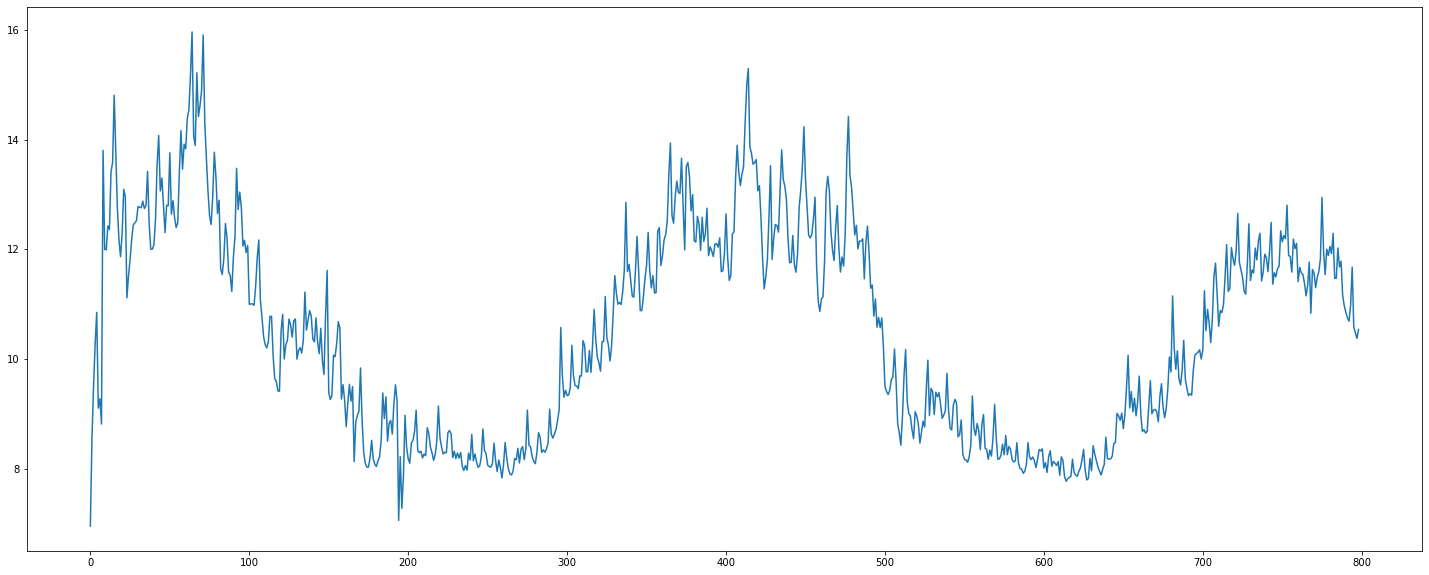

In [19]:
weather_energy['avg_energy'].plot(x=weather_energy['day'],figsize=(25,10))

In [20]:
y = weather_energy['avg_energy'].values
X = weather_energy[['temperatureMax',
       'windBearing', 'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','holiday_ind']].values
X.shape
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,18))
y = sc_y.fit_transform(y.reshape(-1,1))
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)


In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Dense(units=5,input_shape=(18,),activation='relu', kernel_initializer='he_normal'))

In [24]:
model.add(Dense(units=8,activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(units=24,activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(units=256,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units=124,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units=1,activation='relu', kernel_initializer='he_normal'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 95        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 48        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0

In [25]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss = 'mean_squared_error')

Epoch 1/200
24/24 [==============================] - 0s 1ms/step - loss: 0.9970
Epoch 2/200
24/24 [==============================] - 0s 1ms/step - loss: 0.9973
Epoch 3/200
24/24 [==============================] - 0s 914us/step - loss: 0.9969
Epoch 4/200
24/24 [==============================] - 0s 914us/step - loss: 0.9938
Epoch 5/200
24/24 [==============================] - 0s 831us/step - loss: 1.0003
Epoch 6/200
24/24 [==============================] - 0s 914us/step - loss: 0.9902
Epoch 7/200
24/24 [==============================] - 0s 873us/step - loss: 0.9977
Epoch 8/200
24/24 [==============================] - 0s 873us/step - loss: 0.9904
Epoch 9/200
24/24 [==============================] - 0s 914us/step - loss: 0.9856
Epoch 10/200
24/24 [==============================] - 0s 873us/step - loss: 0.9803
Epoch 11/200
24/24 [==============================] - 0s 873us/step - loss: 0.9820
Epoch 12/200
24/24 [==============================] - 0s 873us/step - loss: 1.0090
Epoch 13/200
24/2

24/24 [==============================] - 0s 2ms/step - loss: 0.8583
Epoch 101/200
24/24 [==============================] - 0s 1ms/step - loss: 0.8665
Epoch 102/200
24/24 [==============================] - 0s 1ms/step - loss: 0.8600
Epoch 103/200
24/24 [==============================] - 0s 1ms/step - loss: 0.8601
Epoch 104/200
24/24 [==============================] - 0s 956us/step - loss: 0.8748
Epoch 105/200
24/24 [==============================] - 0s 997us/step - loss: 0.8546
Epoch 106/200
24/24 [==============================] - 0s 1ms/step - loss: 0.8639
Epoch 107/200
24/24 [==============================] - 0s 1ms/step - loss: 0.8579
Epoch 108/200
24/24 [==============================] - 0s 1ms/step - loss: 0.8775
Epoch 109/200
24/24 [==============================] - 0s 1ms/step - loss: 0.8667
Epoch 110/200
24/24 [==============================] - 0s 1ms/step - loss: 0.8621
Epoch 111/200
24/24 [==============================] - 0s 997us/step - loss: 0.8582
Epoch 112/200
24/24 [===

24/24 [==============================] - 0s 956us/step - loss: 0.8510
Epoch 199/200
24/24 [==============================] - 0s 914us/step - loss: 0.8503
Epoch 200/200
24/24 [==============================] - 0s 1ms/step - loss: 0.8573


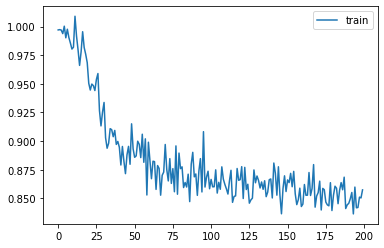

In [26]:
history = model.fit(X_train,y_train,epochs=200)
# plot history
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test) 

In [29]:
y_test.shape

(40, 1)

In [30]:
mean_squared_error(y_test,y_pred)

3.108035377522067

In [31]:
rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred) / y_test)), axis=0))*100
print(rmspe[0])

18.027047918584838


In [32]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,10.749830,10.597876
1,11.431619,10.464965
2,9.332439,10.464965
3,8.064253,10.464965
4,7.946943,10.464965
5,7.999090,10.464965
6,14.074913,11.002877
7,11.622884,10.464965
8,10.777870,10.464965
9,8.162498,10.464965


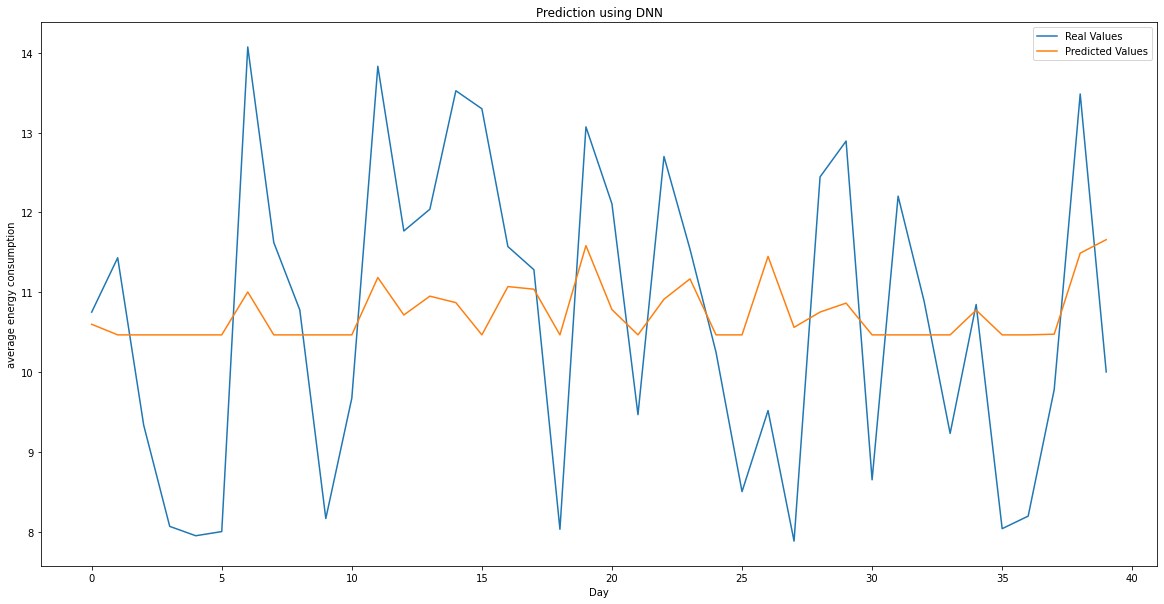

In [33]:
df.plot(figsize=(20,10))
#df['Real Values'].plot(label='Real Values')
plt.title('Prediction using DNN')
plt.xlabel("Day")
plt.ylabel("average energy consumption")
plt.savefig('DNN_pred.png')
plt.show()